# Algoritmo evolutivo multi/many-objective (pymoo)

### Descripción

<font size="4"> Optimización evolutiva multi-objetivo con la plataforma pymoo (minimización).

### Algoritmos
    
- <font size="3"> NSGA-II
- <font size="3"> NSGA-III
    
### Problemas de test
- <font size="3"> dtlz2 $-$ 2 objetivos
- <font size="3"> dtlz2 $-$ 3 objetivos
- <font size="3"> dtlz2 $-$ 4 objetivos
    
---

### Requerimientos

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pymoo.optimize import minimize
from pymoo.termination import get_termination
from pymoo.util.plotting import plot
from pymoo.visualization.scatter import Scatter
from pymoo.visualization.pcp import PCP
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.indicators.gd import GD
from pymoo.indicators.gd_plus import GDPlus
from pymoo.indicators.igd import IGD
from pymoo.indicators.igd_plus import IGDPlus
from pymoo.indicators.hv import HV
from pymoo.problems import get_problem
from pymoo.core.problem import ElementwiseProblem

### Parámetros de los algoritmos
- $pop\_size$: Tamaño de la población
- $n\_gen$: Número de generaciones
- $seed$: Semilla para reproducibilidad

In [5]:
pop_size = 100
n_gen = 100
seed = 1

### Definición del problema de optimización multi-objetivo
- $name$: Nombre del problema
- $n\_obj$: Número de objetivos
- $n\_var$: Número de variables

In [6]:
class Shaffer_N1(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=1, n_obj=2, xl=np.array([-2.0]), xu=np.array([2.0])) # -2<=x<=2  

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = x ** 2
        f2 = (x-2) ** 2
        out["F"] = np.column_stack([f1, f2])
        
    def _calc_pareto_front(self, n_pareto_points=100):
        x = np.linspace(self.xl[0], self.xu[0], n_pareto_points)
        f1_x = x**2
        f2_x = (np.sqrt(f1_x)-2)**2    
        return np.array([f1_x,f2_x]).T
    
problem = [
    Shaffer_N1()
]

### Visualización de puntos

In [7]:
def VisualizacionPuntos(title,values):
    if (len(values[0])>3):
        scatter = PCP()
    else:
        scatter = Scatter(angle=(45, 45), title=title)
    scatter.add(values)
    scatter.show()
    plt.title(title,pad=20)
    plt.grid(True)
    plt.show()

### Puntos de referencia
- $n\_points$: Número de puntos de referencia

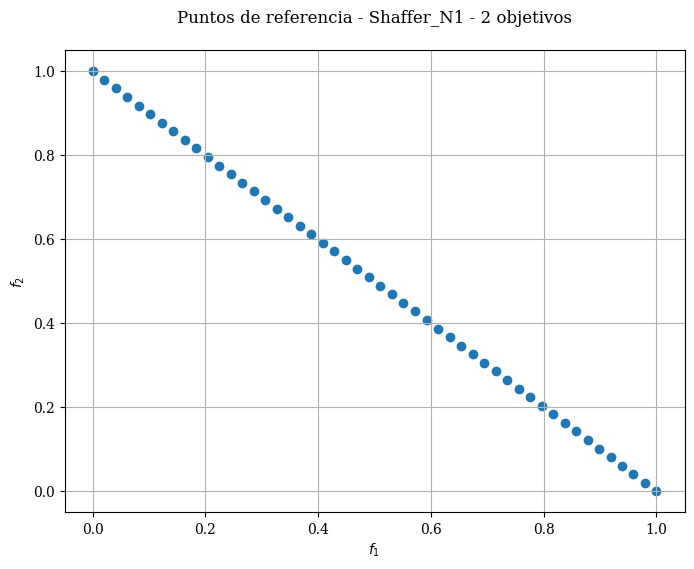

In [8]:
n_points = 50
ref_dirs = [ get_reference_directions(name="energy", n_dim=problem[iProblem].n_obj, n_points=n_points, seed=1) for iProblem in range(len(problem))]

for iProblem in range(len(problem)):
    title = "Puntos de referencia - "+problem[iProblem].name()+" - "+str(problem[iProblem].n_obj)+" objetivos"
    VisualizacionPuntos(title,ref_dirs[iProblem])

### Frentes de Pareto

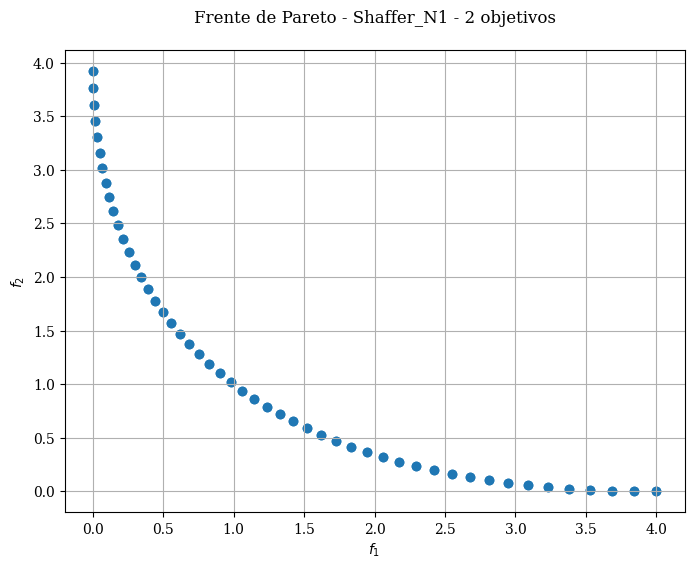

In [9]:
pf = [None]*len(problem)
for iProblem in range(len(problem)):
    if (problem[iProblem].n_obj>3):
        pf[iProblem] = problem[iProblem].pareto_front(ref_dirs[iProblem])
    else:
        pf[iProblem] = problem[iProblem].pareto_front() # por defecto    
        
for iProblem in range(len(problem)):
    title = "Frente de Pareto - "+problem[iProblem].name()+" - "+str(problem[iProblem].n_obj)+" objetivos"
    VisualizacionPuntos(title,pf[iProblem])

### Construcción de las instancias de los algoritmos

In [10]:
algorithm = [ 
    [   
    NSGA2(
        pop_size=pop_size,
        seed=seed
    ),
    NSGA3(
        pop_size=pop_size,
        ref_dirs=ref_dirs[iProblem],
        seed=seed
    )
] for iProblem in range(len(problem)) ]


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False



### Ejecución de los algoritmos

In [11]:
termination = get_termination("n_gen", n_gen)
res = [ [None]*len(algorithm[iProblem]) for iProblem in range(len(problem))]
for iProblem in range(len(problem)):
    for iAlgorithm in range(len(algorithm[iProblem])):
        print("Problema",problem[iProblem].name(),",",problem[iProblem].n_obj," objetivos:")
        print("Algoritmo",algorithm[iProblem][iAlgorithm].__class__.__name__)
        res[iProblem][iAlgorithm] = minimize(problem=problem[iProblem],
                                             algorithm=algorithm[iProblem][iAlgorithm],
                                             termination=termination,
                                             seed=seed,
                                             save_history=True,
                                             verbose=True)

Problema Shaffer_N1 , 2  objetivos:
Algoritmo NSGA2
n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv     
     1 |      100 |     50 |  0.0179151364 |  0.0089421702 |  0.8134918561
     2 |      200 |    100 |  0.0109033846 |  0.0084780199 |  0.8202814675
     3 |      300 |    100 |  0.0059062976 |  0.0085987515 |  0.8248379676
     4 |      400 |    100 |  0.0058289263 |  0.0084306164 |  0.8251030787
     5 |      500 |    100 |  0.0053936068 |  0.0085557398 |  0.8255019449
     6 |      600 |    100 |  0.0047260325 |  0.0084603023 |  0.8256264439
     7 |      700 |    100 |  0.0049188187 |  0.0082202292 |  0.8254412134
     8 |      800 |    100 |  0.0060200919 |  0.0083321580 |  0.8249924586
     9 |      900 |    100 |  0.0056139114 |  0.0085955368 |  0.8255067501
    10 |     1000 |    100 |  0.0053450096 |  0.0083791751 |  0.8253009538
    11 |     1100 |    100 |  0.0063818007 |  0.0080693755 |  0.8251559750
    12 |     1200 |    100 |  0.0061439739 |  0.

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv     
     1 |      100 |     23 |  0.0393532984 |  0.0091838586 |  0.8036040796
     2 |      200 |     36 |  0.0235092613 |  0.0073624159 |  0.8159431247
     3 |      300 |     46 |  0.0216075361 |  0.0085527919 |  0.8186350719
     4 |      400 |     50 |  0.0222684442 |  0.0084846396 |  0.8192996949
     5 |      500 |     50 |  0.0224688066 |  0.0088088047 |  0.8194813740
     6 |      600 |     50 |  0.0226366935 |  0.0089808935 |  0.8195223124
     7 |      700 |     50 |  0.0226083618 |  0.0089297457 |  0.8194439848
     8 |      800 |     50 |  0.0226078371 |  0.0089009205 |  0.8194156910
     9 |      900 |     50 |  0.0215069945 |  0.0084135597 |  0.8194108144
    10 |     1000 |     50 |  0.0216224136 |  0.0087192709 |  0.8194240590
    11 |     1100 |     50 |  0.0216659071 |  0.0087558959 |  0.8194392148
    12 |     1200 |     50 |  0.0213900661 |  0.0086483099 |  0.8193069783
    13 |     1300 |     5

### Imprimir los valores de la solución y fitness

In [13]:
for iProblem in range(len(problem)):
    for iAlgorithm in range(len(algorithm[iProblem])):
        print("Problema",problem[iProblem].name(),",",problem[iProblem].n_obj," objetivos:")
        print("Algoritmo",algorithm[iProblem][iAlgorithm].__class__.__name__)
        print("Solución: \nX = %s\nF = %s" % (res[iProblem][iAlgorithm].X, res[iProblem][iAlgorithm].F))

Problema Shaffer_N1 , 2  objetivos:
Algoritmo NSGA2
Solución: 
X = [[ 2.00000000e+00]
 [-2.09994198e-04]
 [ 1.97149358e+00]
 [ 1.11525196e+00]
 [ 1.92473896e+00]
 [ 1.29099864e+00]
 [ 4.56421681e-02]
 [ 1.32763471e+00]
 [ 1.84002874e+00]
 [ 2.13463165e-01]
 [ 7.93718755e-01]
 [ 3.29844962e-01]
 [ 9.03464857e-02]
 [ 2.31498470e-01]
 [ 1.59115743e+00]
 [ 1.88711834e+00]
 [ 1.33825150e-01]
 [ 7.61129897e-01]
 [ 3.70255932e-01]
 [ 8.08364030e-01]
 [ 1.08402967e+00]
 [ 8.61927153e-01]
 [ 1.61682803e+00]
 [ 1.76681844e+00]
 [ 2.56931973e-01]
 [ 1.14222151e+00]
 [ 6.64945997e-01]
 [ 5.62252218e-01]
 [ 9.11718981e-01]
 [ 1.79866646e+00]
 [ 1.83381743e-01]
 [ 1.65317847e+00]
 [ 7.51833169e-01]
 [ 1.48195643e+00]
 [ 1.59559196e-01]
 [ 1.57355855e+00]
 [ 1.20177654e+00]
 [ 6.15335322e-01]
 [ 1.37753644e+00]
 [ 1.54678929e+00]
 [ 6.39494047e-01]
 [ 1.75308062e+00]
 [ 3.07325992e-01]
 [ 4.93807616e-01]
 [ 1.81173590e+00]
 [ 2.87054704e-01]
 [ 1.90606986e+00]
 [ 8.35164436e-01]
 [ 9.66643520e-01]
 [

### Visualización de las soluciones obtenidas y del frente de Pareto

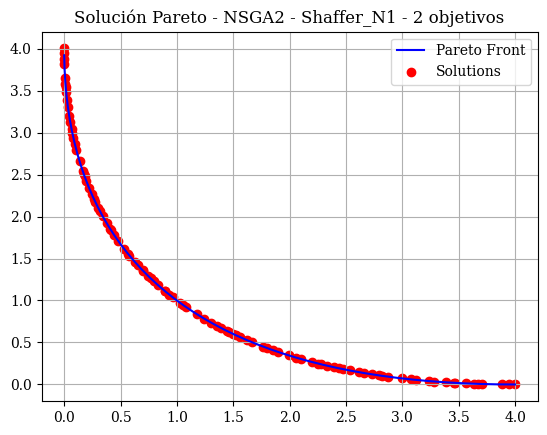

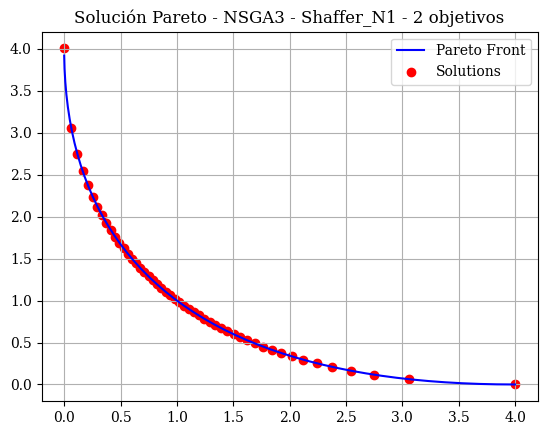

In [14]:
def VisualizacionSolucion(title,f,pf):
    if (len(f[0])>2):
        VisualizacionPuntos(title,f)
        return
    
    fig, ax = plt.subplots()

    # Agregar el frente pareto
    x = [v[0] for v in pf]
    y = [v[1] for v in pf]
    ax.plot(x, y, linestyle='-', color='blue', label='Pareto Front')
    
    # Agregar las soluciones obtenidas
    x = [v[0] for v in f]
    y = [v[1] for v in f]
    ax.scatter(x, y, color='red', label='Solutions')

    # Mostrar el título
    plt.title(title)

    # Mostrar la leyenda
    plt.legend()    

    plt.grid(True)
    
    plt.show()
    
for iProblem in range(len(problem)):
    for iAlgorithm in range(len(algorithm[iProblem])):
        title = "Solución Pareto - "+algorithm[iProblem][iAlgorithm].__class__.__name__ +" - "+problem[iProblem].name()+" - "+str(problem[iProblem].n_obj)+" objetivos"
        VisualizacionSolucion(title,res[iProblem][iAlgorithm].F,pf[iProblem])

### Indicadores de rendimiento

In [15]:
nadir = [[4.0 for _ in range(problem[iProblem].n_obj)] for iProblem in range(len(problem))]
maxArea = [4.0 for iProblem in range(len(problem))]

indicator = [ 
    [
        GD(pf[iProblem]),
        GDPlus(pf[iProblem]),
        IGD(pf[iProblem]),
        IGDPlus(pf[iProblem]),
        HV(nadir[iProblem])
    ] for iProblem in range(len(problem))
]

for iIndicator in range(len(indicator[0])):    
    print(indicator[iProblem][iIndicator].__class__.__name__)
    cadena = "Problema Objetivos \t "
    for iAlgorithm in range(len(algorithm[iProblem])):            
        cadena += algorithm[iProblem][iAlgorithm].__class__.__name__+" \t\t\t "
    print(cadena)
    for iProblem in range(len(problem)):
        cadena = problem[iProblem].name()+" \t "+str(problem[iProblem].n_obj)+" \t\t "
        for iAlgorithm in range(len(algorithm[iProblem])):      
            valueIndicator = indicator[iProblem][iIndicator](res[iProblem][iAlgorithm].F)
            cadena += str(valueIndicator)+" \t "
        print(cadena)
print("HV normalizado")
cadena = "Problema Objetivos \t "
for iAlgorithm in range(len(algorithm[iProblem])):            
    cadena += algorithm[iProblem][iAlgorithm].__class__.__name__+" \t\t\t "
print(cadena)
for iProblem in range(len(problem)):
    cadena = problem[iProblem].name()+" \t "+str(problem[iProblem].n_obj)+" \t\t "
    for iAlgorithm in range(len(algorithm[iProblem])):      
        valueIndicator = indicator[iProblem][len(indicator[iProblem])-1](res[iProblem][iAlgorithm].F)/maxArea[iProblem]
        cadena += str(valueIndicator)+" \t "
    print(cadena)

GD
Problema Objetivos 	 NSGA2 			 NSGA3 			 
Shaffer_N1 	 2 		 0.03299708466070383 	 0.030570209263293582 	 
GDPlus
Problema Objetivos 	 NSGA2 			 NSGA3 			 
Shaffer_N1 	 2 		 0.014161200624987156 	 0.01776631101836538 	 
IGD
Problema Objetivos 	 NSGA2 			 NSGA3 			 
Shaffer_N1 	 2 		 0.020821917707567625 	 0.0814726921720495 	 
IGDPlus
Problema Objetivos 	 NSGA2 			 NSGA3 			 
Shaffer_N1 	 2 		 0.008693595310276065 	 0.01986869292455004 	 
HV
Problema Objetivos 	 NSGA2 			 NSGA3 			 
Shaffer_N1 	 2 		 13.26690548255782 	 13.162820511352027 	 
HV normalizado
Problema Objetivos 	 NSGA2 			 NSGA3 			 
Shaffer_N1 	 2 		 3.316726370639455 	 3.290705127838007 	 


### Visualización de la evolución de los algoritmos

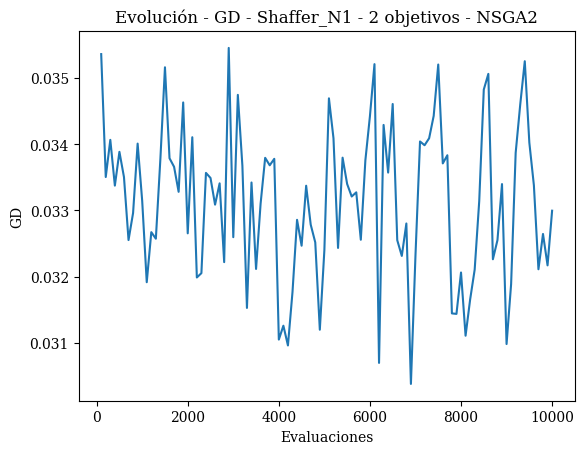

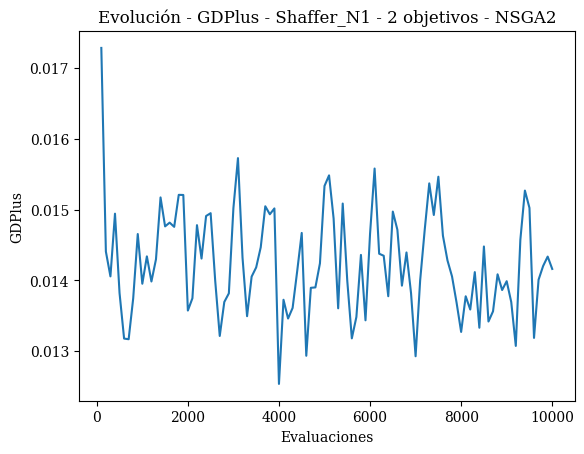

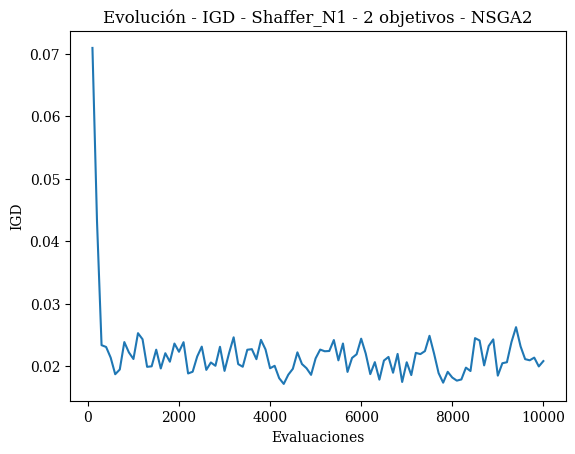

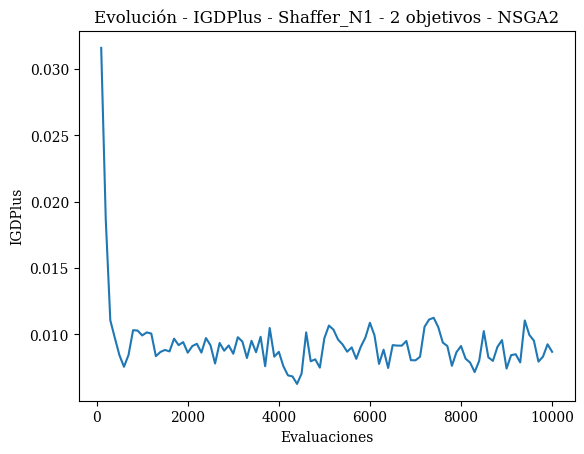

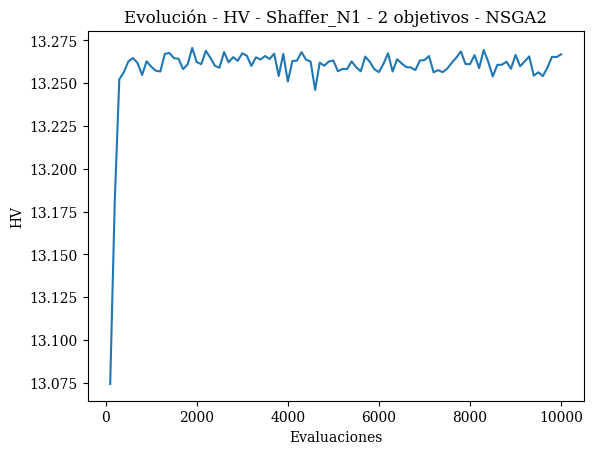

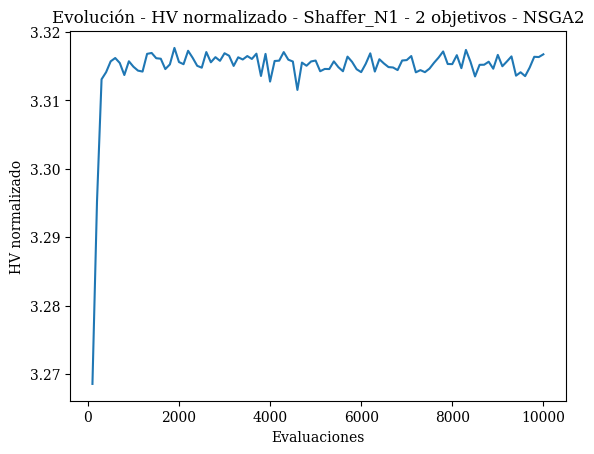

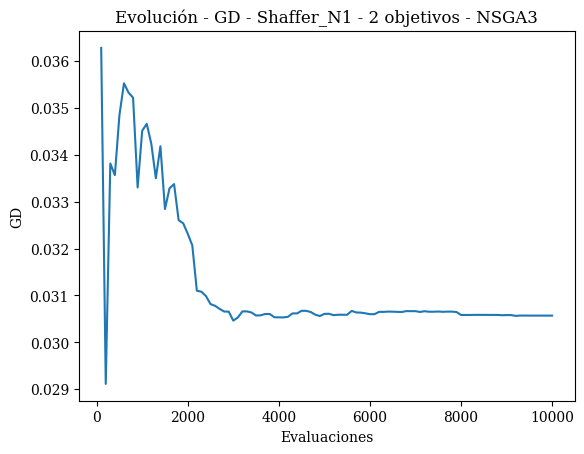

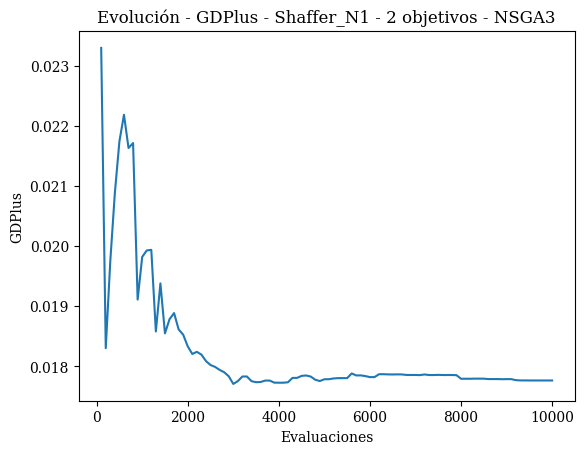

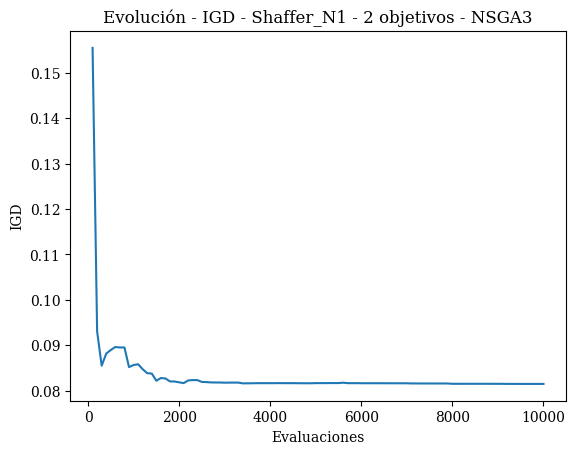

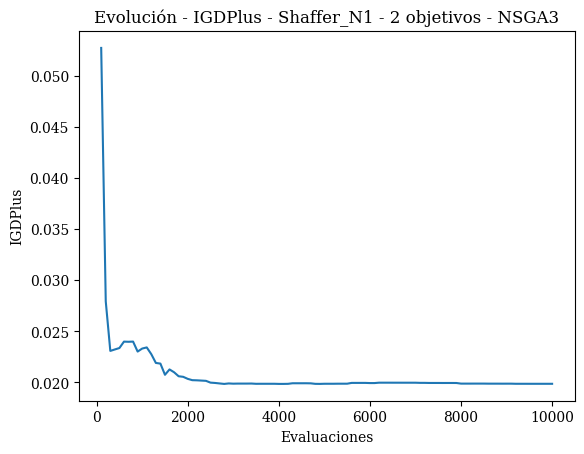

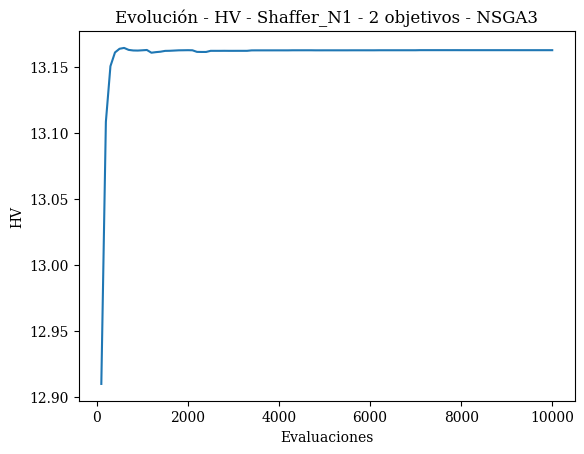

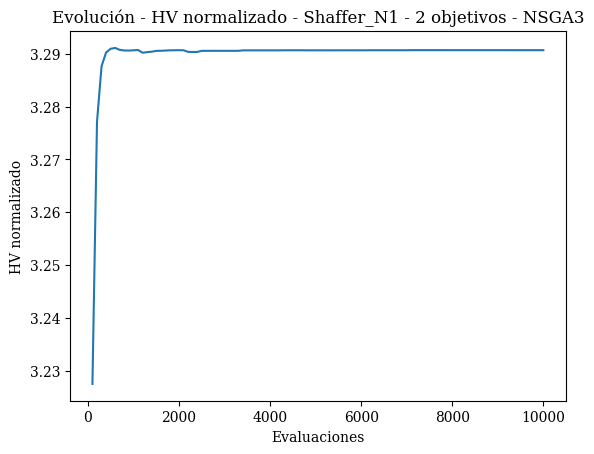

In [16]:
def VisualizacionEvolucion(title,res,values,yTitle):    
    n_evals = np.array([e.evaluator.n_eval for e in res.history]) # array con los números de evaluaciones
    fig, ax = plt.subplots()
    ax.set_title(title)
    plt.plot(n_evals, values)
    plt.xlabel("Evaluaciones")
    plt.ylabel(yTitle)
    plt.show() 

for iProblem in range(len(problem)):    
    for iAlgorithm in range(len(algorithm[iProblem])):
        for iIndicator in range(len(indicator[iProblem])):
            values = np.array([indicator[iProblem][iIndicator](e.opt.get("F")) for e in res[iProblem][iAlgorithm].history])
            title = "Evolución - "+indicator[iProblem][iIndicator].__class__.__name__+" - "+problem[iProblem].name()+" - "+str(problem[iProblem].n_obj)+" objetivos - "+algorithm[iProblem][iAlgorithm].__class__.__name__ 
            VisualizacionEvolucion(title,res[iProblem][iAlgorithm],values,indicator[iProblem][iIndicator].__class__.__name__)
        values = np.array([indicator[iProblem][len(indicator[iProblem])-1](e.opt.get("F")) for e in res[iProblem][iAlgorithm].history])/maxArea[iProblem]
        title = "Evolución - HV normalizado - "+problem[iProblem].name()+" - "+str(problem[iProblem].n_obj)+" objetivos - "+algorithm[iProblem][iAlgorithm].__class__.__name__ 
        VisualizacionEvolucion(title,res[iProblem][iAlgorithm],values,"HV normalizado")